In [1]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import math
from subprocess import check_output

In [8]:
n1 = np.arange(2,10**5,500)
n2 = np.arange(3,10**5,512)
n3 = np.arange(3,2000,20)
tarefas = ["tarefa1","tarefa2"]
n1.shape

(200,)

In [3]:
#gerando arquivos txt arvores linha reta
if not os.path.exists("entradas"):
    os.mkdir("entradas")
if not os.path.exists("entradas/linetree"):    
    os.mkdir("entradas/linetree")
for i in range(len(n1)):
    if not os.path.isfile("entradas/linetree/t"+str(i)+".txt"):
        with open("entradas/linetree/t"+str(i)+".txt","w") as f:
            f.write(str(n1[i]) +" "+ str(n1[i]-1)+"\n")
            for j in range(n1[i]-1):
                f.write(str(j)+ " " +str(j+1)+"\n")    

In [4]:
#arvores arquivos txt arvores binarias
if not os.path.exists("entradas"):
    os.mkdir("entradas")
if not os.path.exists("entradas/binarytree"):    
    os.mkdir("entradas/binarytree")
for i in range(len(n2)):
    if not os.path.isfile("entradas/binarytree/t"+str(i)+".txt"):
        with open("entradas/binarytree/t"+str(i)+".txt","w") as f:
            f.write(str(n2[i]) +" "+ str(n2[i]-1)+"\n")
            l = 1
            for j in range(math.floor(n2[i]/2)-1):
                for k in range(2):
                    f.write(str(j) +" "+ str(l)+"\n")
                    l = l + 1               

In [28]:
#contando os tempos de execução 
qtd = 10
tempos = np.zeros((2,n1.shape[0], qtd))
for t in range(len(tarefas)):
    for j in range(len(n1)):
        for i in range(qtd):
            #marcando o tempo de execução
            inicio = time.time()
            os.system('./../bin/tp3 '+ tarefas[t] +' "entradas/linetree/t'+str(j)+'.txt"')
            fim = time.time()
            tempos[t,j,i] = fim - inicio

In [38]:
#media dos tempos de execuçao 
mediaTempoTarefa1 = np.mean(tempos[0],axis=1)
mediaTempoTarefa2 = np.mean(tempos[1],axis=1)
#desvio padrao dos tempos
DesvioPadraoTarefa1 = np.std(tempos[0],axis=1)
DesvioPadraoTarefa2 = np.std(tempos[1],axis=1)

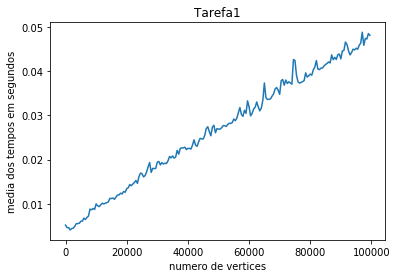

In [42]:
#plotando as medias dos tempos de excuçao 
plt.title("Tarefa1 Line tree")
plt.ylabel('media dos tempos em segundos')
plt.xlabel('numero de vertices')

plt.plot(n1,mediaTempoTarefa1)

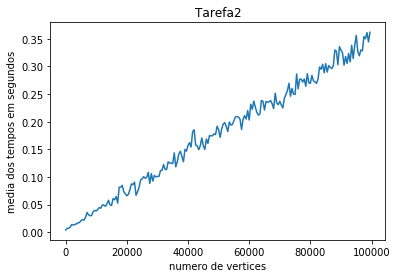

In [43]:
#plotando as medias dos tempos de excuçao
plt.title("Tarefa2 linetree")
plt.ylabel('media dos tempos em segundos')
plt.xlabel('numero de vertices')

plt.plot(n1,mediaTempoTarefa2)

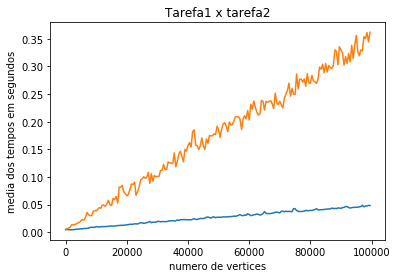

In [44]:
#plotando as medias dos tempos de excuçao 
plt.title("Tarefa1 x tarefa2 linetree")
plt.ylabel('media dos tempos em segundos')
plt.xlabel('numero de vertices')

plt.plot(n1,mediaTempoTarefa1)
plt.plot(n1,mediaTempoTarefa2)

In [49]:
#contando os tempos de execução 
qtd = 10
tempos2 = np.zeros((2,n2.shape[0], qtd))
for t in range(len(tarefas)):
    for j in range(1,len(n2)):
        for i in range(qtd):
            #marcando o tempo de execução
            inicio = time.time()
            os.system('./../bin/tp3 '+ tarefas[t] +' "entradas/binarytree/t'+str(j)+'.txt"')
            fim = time.time()
            tempos2[t,j,i] = fim - inicio

In [50]:
#media dos tempos de execuçao 
mediaTempoTarefa1 = np.mean(tempos2[0],axis=1)
mediaTempoTarefa2 = np.mean(tempos2[1],axis=1)
#desvio padrao dos tempos
DesvioPadraoTarefa1 = np.std(tempos2[0],axis=1)
DesvioPadraoTarefa2 = np.std(tempos2[1],axis=1)

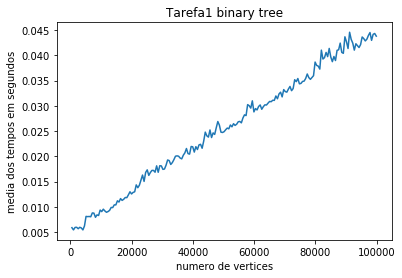

In [51]:
#plotando as medias dos tempos de excuçao 
plt.title("Tarefa1 binary tree")
plt.ylabel('media dos tempos em segundos')
plt.xlabel('numero de vertices')
#numero de arestas
plt.plot(n2[1:],mediaTempoTarefa1[1:])

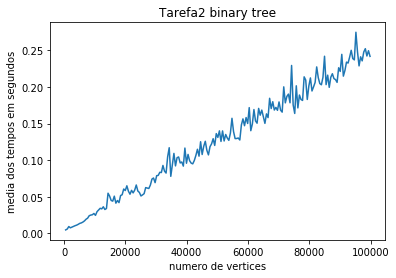

In [52]:
#plotando as medias dos tempos de excuçao 
plt.title("Tarefa2 binary tree")
plt.ylabel('media dos tempos em segundos')
plt.xlabel('numero de vertices')
plt.plot(n2[1:],mediaTempoTarefa2[1:])

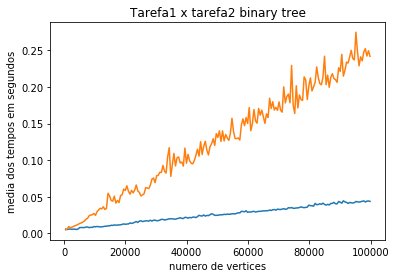

In [53]:
#plotando as medias dos tempos de excuçao 
plt.title("Tarefa1 x tarefa2 binary tree")
plt.ylabel('media dos tempos em segundos')
plt.xlabel('numero de vertices')

plt.plot(n2[1:],mediaTempoTarefa1[1:])
plt.plot(n2[1:],mediaTempoTarefa2[1:])

In [6]:
vamos1 =  os.system('./../bin/tp3 "tarefa1" "entradas/linetree/t145.txt"')
vamos2 =  os.system('./../bin/tp3 "tarefa2" "entradas/linetree/t145.txt"')
#esult2/result1
vamos1,vamos2

(39680, 13824)

In [11]:
#comparando solucao heuristica com solucao polinomial
#line tree

result = np.zeros((n1.shape[0]))
tarefa1 = np.zeros((n1.shape[0]))
tarefa2 = np.zeros((n1.shape[0]))
for j in range(len(n1)):
    tarefa1[j] = int (check_output('./../bin/tp3 "tarefa1" "entradas/linetree/t'+str(j)+'.txt"', shell=True))
    tarefa2[j] = int (check_output('./../bin/tp3 "tarefa2" "entradas/linetree/t'+str(j)+'.txt"', shell=True))
    result[j]  = tarefa2[j]/tarefa1[j]
       

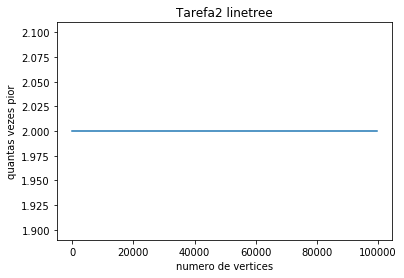

In [9]:
#plotando as medias dos tempos de excuçao
plt.title("Tarefa2 linetree")
plt.ylabel('quantas vezes pior')
plt.xlabel('numero de vertices')

plt.plot(n1,result)

In [12]:
#comparando solucao heuristica com solucao polinomial
#binary tree

result = np.zeros((n2.shape[0]))
tarefa1 = np.zeros((n2.shape[0]))
tarefa2 = np.zeros((n2.shape[0]))
for j in range(1,len(n2)):
    tarefa1[j] = int (check_output('./../bin/tp3 "tarefa1" "entradas/binarytree/t'+str(j)+'.txt"', shell=True))
    tarefa2[j] = int (check_output('./../bin/tp3 "tarefa2" "entradas/binarytree/t'+str(j)+'.txt"', shell=True))
    result[j]  = tarefa2[j]/tarefa1[j]
       
       

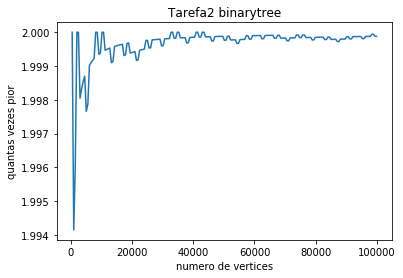

In [19]:
#plotando as medias dos tempos de excuçao
plt.title("Tarefa2 binarytree")
plt.ylabel('quantas vezes pior')
plt.xlabel('numero de vertices')

plt.plot(n2[1:],result[1:])

In [ ]:
#gerando arquivos txt agrafos completos
if not os.path.exists("entradas"):
    os.mkdir("entradas")
if not os.path.exists("entradas/kgraph"):    
    os.mkdir("entradas/kgraph")  
for i in range(len(n3)):
    if not os.path.isfile("entradas/kgraph/t"+str(i)+".txt"):
        with open("entradas/kgraph/t"+str(i)+".txt","w") as f:
            f.write(str(n3[i]) +" "+ str(int(((n3[i]**2) - n3[i])/2) ) +"\n" )
            for j in range(n3[i]-1):
                for k in range(j+1,n3[i]):
                    f.write(str(j)+ " " +str(k)+"\n")   

In [5]:
#contando os tempos de execução 
qtd = 10
tempos = np.zeros((85, qtd))
for j in range(85):
    for i in range(qtd):
        #marcando o tempo de execução
        inicio = time.time()
        os.system('./../bin/tp3 "tarefa2" "entradas/kgraph/t'+str(j)+'.txt"')
        fim = time.time()
        tempos[j,i] = fim - inicio

In [6]:
#media dos tempos de execuçao 
mediaTempo = np.mean(tempos,axis=1)
#desvio padrao dos tempos
DesvioPadrao = np.std(tempos,axis=1)


(85,)
(100,)


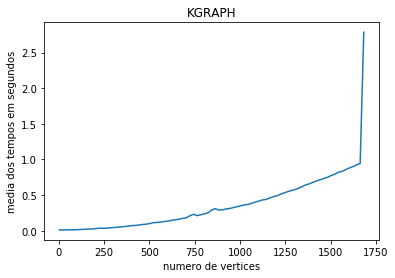

In [17]:
#plotando as medias dos tempos de excuçao 
plt.title("KGRAPH")
plt.ylabel('media dos tempos em segundos')
plt.xlabel('numero de vertices')
print(mediaTempo.shape)
print (n3.shape)
plt.plot(n3[:85],mediaTempo)